In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
import tensorflow.keras.optimizers as optimizers
import os
import cv2
from tensorflow.keras import backend as K
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [5]:
#load dataset
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
(X_train, y_train) = (X_train[:100], y_train[:100])

print("Shape X_train: ", X_train.shape)
print("Shape y_train: ", y_train.shape)
print("Shape X_test: ", X_test.shape)
print("Shape y_test: ", y_test.shape)

Shape X_train:  (100, 28, 28)
Shape y_train:  (100,)
Shape X_test:  (10000, 28, 28)
Shape y_test:  (10000,)


In [3]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

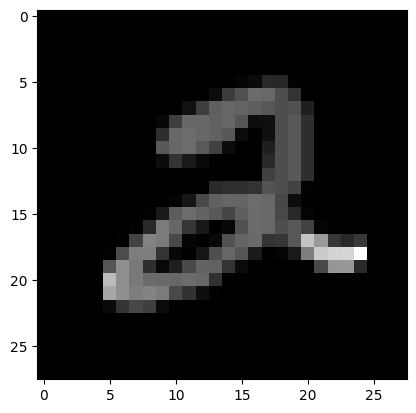

In [4]:
plt.imshow(X_train[5], cmap='gray')

In [6]:
#build model CNN

model = Sequential(
    [
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')        
    ]
)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=10)

f:\Nam_3\WorkshopAIForTBier\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.1300 - loss: 70.2429
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2200 - loss: 30.3550
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3400 - loss: 15.3717
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2900 - loss: 10.8612
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4900 - loss: 3.1125
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5200 - loss: 2.2423
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5000 - loss: 1.6558
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5100 - loss: 1.5596
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5900 - loss: 1.0964 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6600 - loss: 0.8991


In [7]:
model.evaluate(X_test.reshape(-1, 28, 28, 1), y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5700 - loss: 1.4071


[1.4071474075317383, 0.5699999928474426]

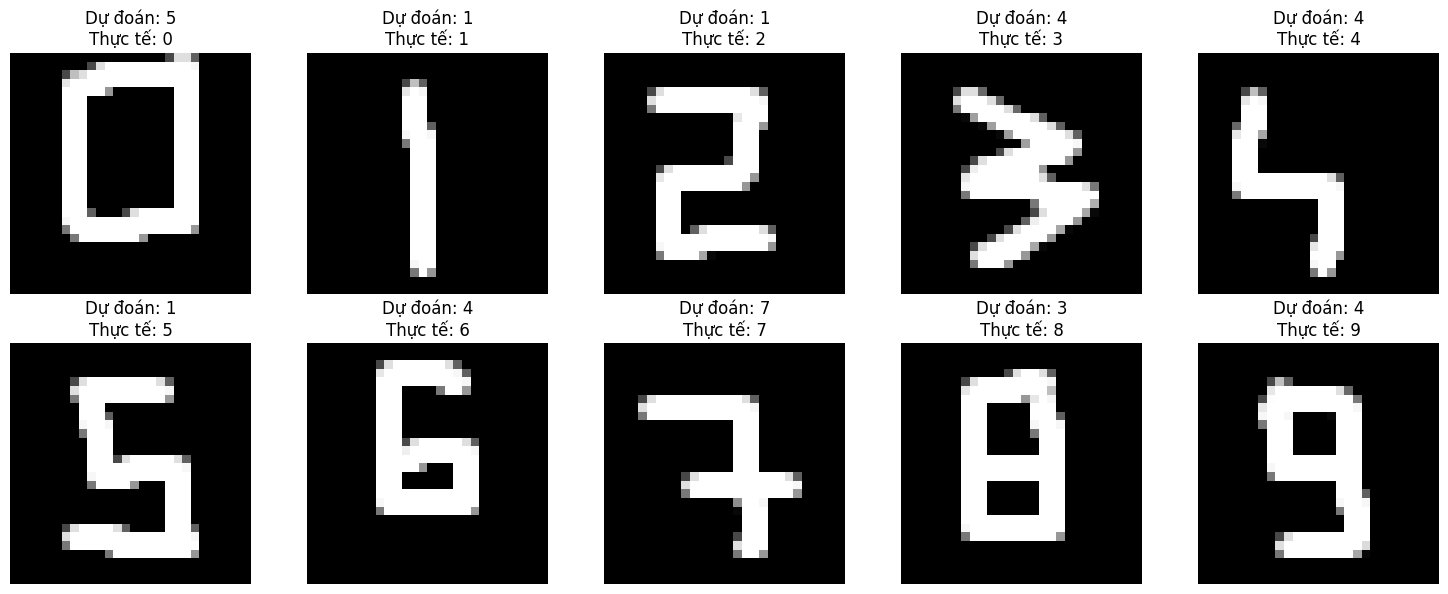


Bạn đã dự đoán đúng 3 / 10 chữ số
Độ chính xác: 30.0%


In [14]:
# Test on my data
images = []
predictions = []
true_labels = []
index = 0

# Thu thập tất cả ảnh và dự đoán
while os.path.exists(f'test2/{index}.png'):
    img = cv2.imread(f'test2/{index}.png', cv2.IMREAD_GRAYSCALE)
    img = np.invert(np.array(img))
    img_reshaped = img.reshape(1, 28, 28, 1)
    y_pred = model.predict(img_reshaped, verbose=0)
    
    images.append(img)
    predictions.append(np.argmax(y_pred))
    true_labels.append(index)
    index += 1

# Hiển thị tất cả ảnh cùng lúc
plt.figure(figsize=(15, 6))
for i in range(len(images)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f'Dự đoán: {predictions[i]}\nThực tế: {true_labels[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Tính độ chính xác
count = sum(1 for i in range(len(predictions)) if predictions[i] == true_labels[i])
print(f"\nBạn đã dự đoán đúng {count} / {len(images)} chữ số")
print(f"Độ chính xác: {count/len(images)*100:.1f}%")